In [2]:
import matplotlib.pyplot as plt
import keras
from keras import layers,models
import tensorflow as tf
import numpy as np

In [3]:
IMG_SIZE=120
BATCH_SIZE=32

In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Dataset/plant_disease/train/tomato/",seed=10,
                                                            batch_size=BATCH_SIZE,image_size=[IMG_SIZE,IMG_SIZE])

Found 18345 files belonging to 10 classes.


In [8]:
class_names=dataset.class_names
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


<Figure size 720x720 with 0 Axes>

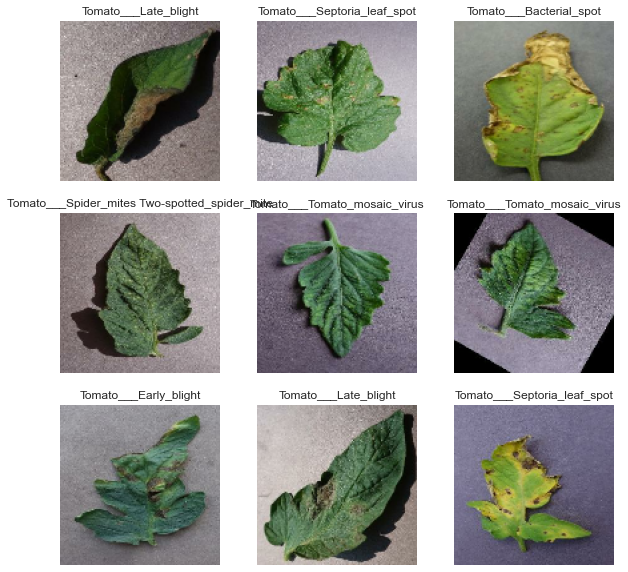

In [9]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn')
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

In [10]:
print(len(dataset))


574


### Train Test Split

In [11]:
def test_train_split(dataset,train_per=0.8,valid_per=0.2):
    n=len(dataset)
    train_len=int(n*train_per)
    train_ds=dataset.take(train_len)
    data=dataset.skip(train_len)
#     test_len=int(n*test_per)
#     test_ds=data.take(test_len)
#     valid_ds=data.skip(test_len)
    return train_ds,data

In [12]:
train_ds,valid_ds=test_train_split(dataset,0.8,0.2)

In [13]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory("Dataset/plant_disease/valid/tomato/",seed=10,
                                                            batch_size=BATCH_SIZE,image_size=[IMG_SIZE,IMG_SIZE])

Found 4585 files belonging to 10 classes.


In [14]:
print(len(train_ds))
print(len(test_ds))
print(len(valid_ds))

459
144
115


In [15]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
vaidl_ds = valid_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

### Augmentation

In [16]:
data_augmentation = models.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [17]:
input_shape=(BATCH_SIZE,IMG_SIZE,IMG_SIZE,3)
n_classes=len(dataset.class_names)
print(n_classes)

10


In [18]:

model=models.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),
    layers.Rescaling(1.0/255),
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),

    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu',padding='same'),
  
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu',padding='same'),
    
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu',padding='same'),
    
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu',padding='same'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(n_classes, activation='softmax')
]
)

In [19]:
model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (32, 120, 120, 3)         0         
                                                                 
 rescaling (Rescaling)       (32, 120, 120, 3)         0         
                                                                 
 sequential (Sequential)     (32, 120, 120, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 120, 120, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 60, 60, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 60, 60, 64)          18496     
                                                      

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=valid_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
459/459 [==============================] - 229s 497ms/step - loss: 1.7855 - accuracy: 0.3451 - val_loss: 1.3053 - val_accuracy: 0.5349
Epoch 2/30
459/459 [==============================] - 216s 470ms/step - loss: 1.0249 - accuracy: 0.6413 - val_loss: 0.8971 - val_accuracy: 0.6885
Epoch 3/30
459/459 [==============================] - 214s 465ms/step - loss: 0.7670 - accuracy: 0.7351 - val_loss: 0.7518 - val_accuracy: 0.7405
Epoch 4/30
459/459 [==============================] - 213s 464ms/step - loss: 0.6264 - accuracy: 0.7784 - val_loss: 0.7765 - val_accuracy: 0.7378
Epoch 5/30
459/459 [==============================] - 212s 463ms/step - loss: 0.5319 - accuracy: 0.8145 - val_loss: 0.5429 - val_accuracy: 0.8069
Epoch 6/30
459/459 [==============================] - 220s 480ms/step - loss: 0.4749 - accuracy: 0.8335 - val_loss: 0.4424 - val_accuracy: 0.8433
Epoch 7/30
459/459 [==============================] - 208s 454ms/step - loss: 0.4284 - accuracy: 0.8540 - val_loss: 0.4656 -

In [23]:
print(model.evaluate(test_ds))
print(model.evaluate(valid_ds))
print(model.evaluate(train_ds))

144/144 [==============================] - 24s 161ms/step - loss: 0.1171 - accuracy: 0.9575
[0.11705757677555084, 0.9574699997901917]
115/115 [==============================] - 29s 162ms/step - loss: 0.1181 - accuracy: 0.9601
[0.11806675791740417, 0.9600765705108643]
459/459 [==============================] - 97s 211ms/step - loss: 0.1004 - accuracy: 0.9630
[0.1004176065325737, 0.9630310535430908]


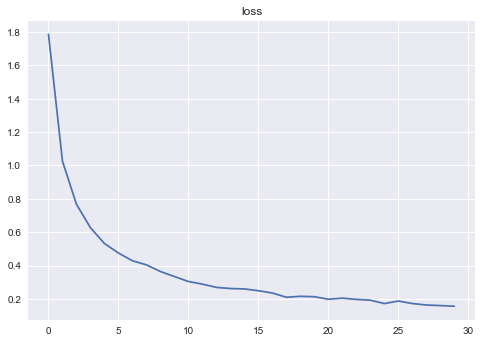

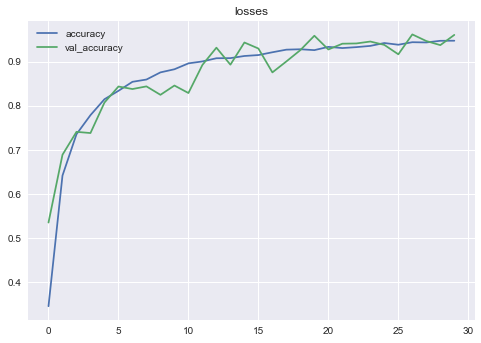

In [24]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('losses')
plt.show()


model=models.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),
    layers.Rescaling(1.0/255),
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
]
)

In [25]:
def predict(img):
    img=img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    arr=model.predict(img)
    ind=np.argmax(arr)
    return dataset.class_names[ind]

Tomato___healthy


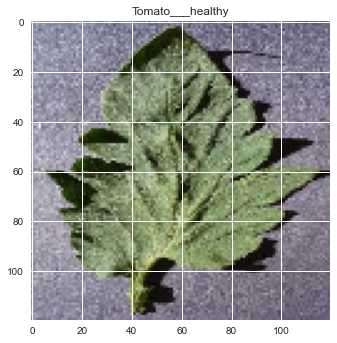

Tomato___Early_blight


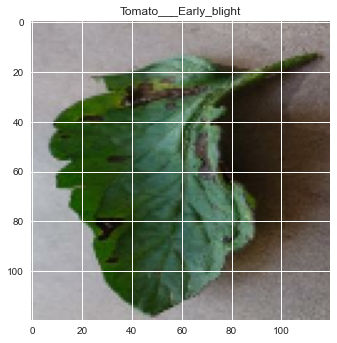

Tomato___Septoria_leaf_spot


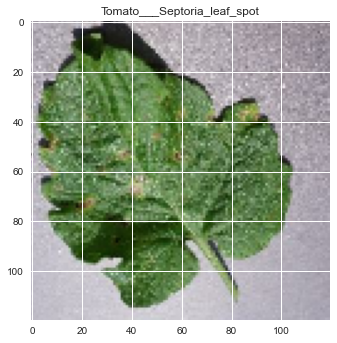

Tomato___Tomato_mosaic_virus


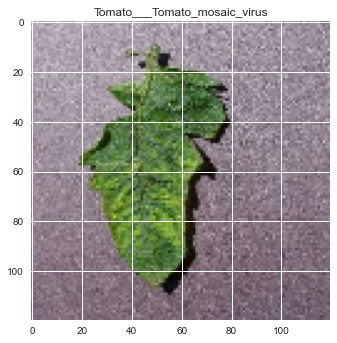

Tomato___Target_Spot


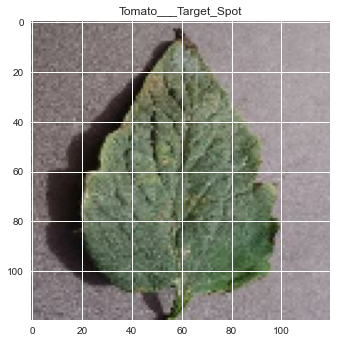

Tomato___healthy


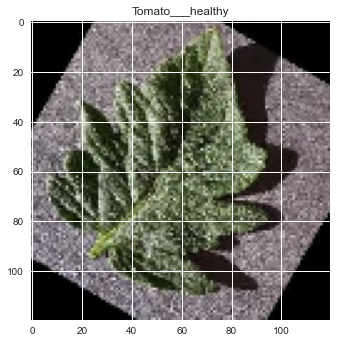

Tomato___healthy


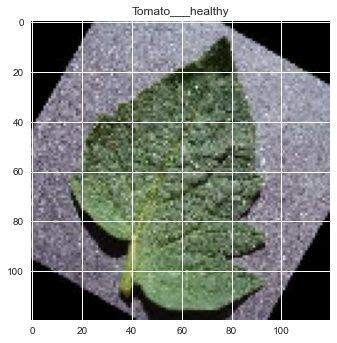

Tomato___Target_Spot


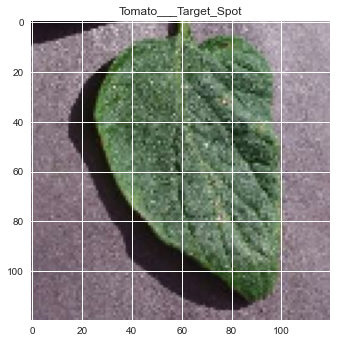

Tomato___healthy


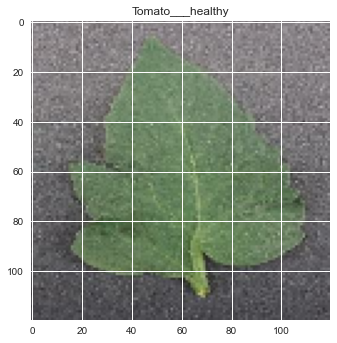

Tomato___healthy


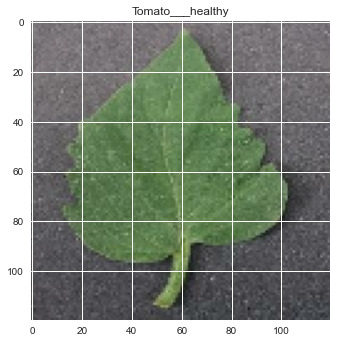

Tomato___Tomato_Yellow_Leaf_Curl_Virus


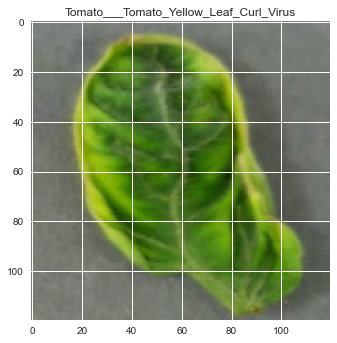

Tomato___healthy


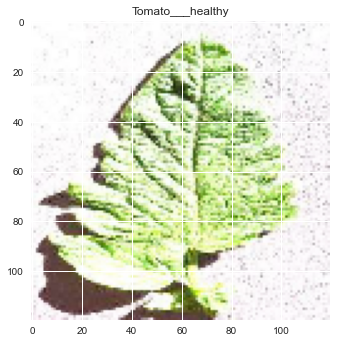

Tomato___Septoria_leaf_spot


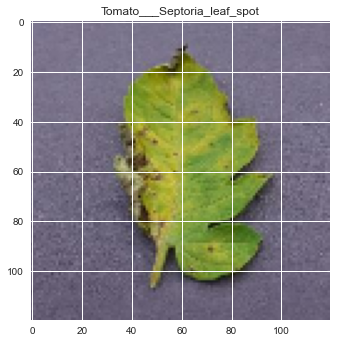

Tomato___Septoria_leaf_spot


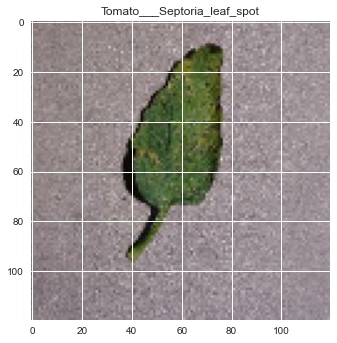

Tomato___healthy


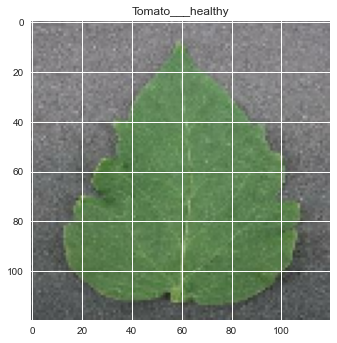

Tomato___Bacterial_spot


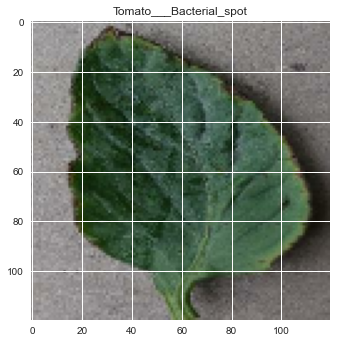

Tomato___Early_blight


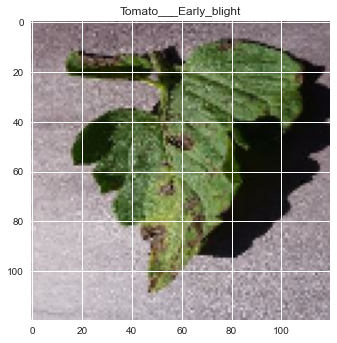

Tomato___Bacterial_spot


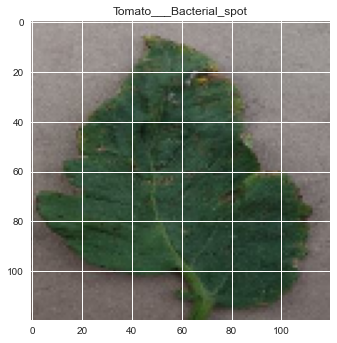

Tomato___Tomato_mosaic_virus


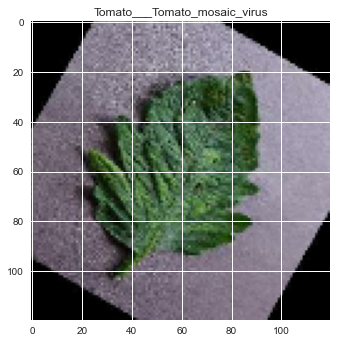

Tomato___Early_blight


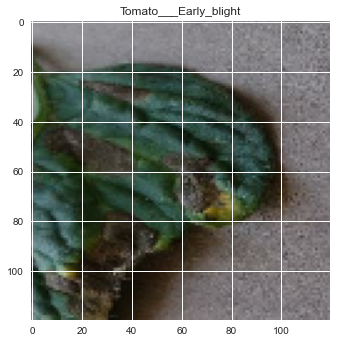

Tomato___healthy


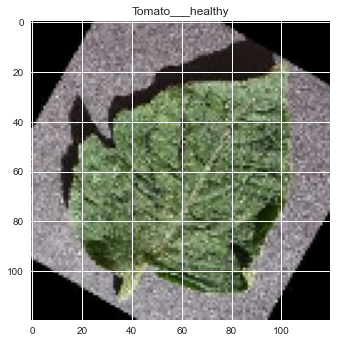

Tomato___Tomato_mosaic_virus


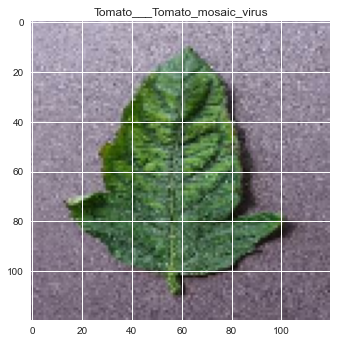

Tomato___healthy


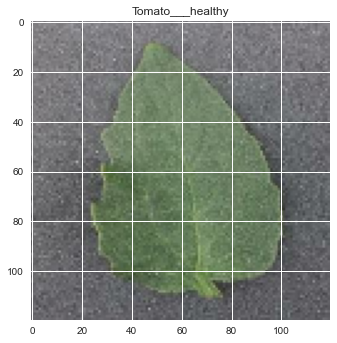

Tomato___Septoria_leaf_spot


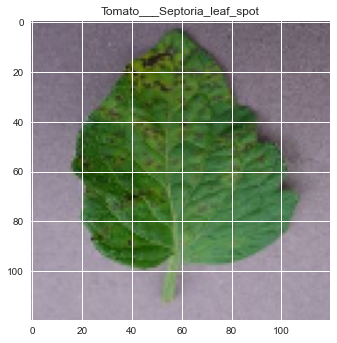

Tomato___Septoria_leaf_spot


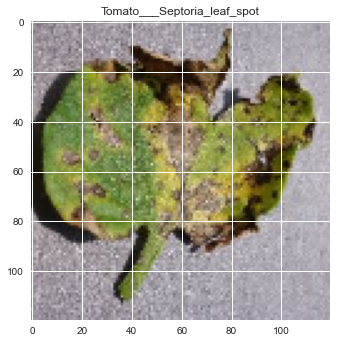

Tomato___Bacterial_spot


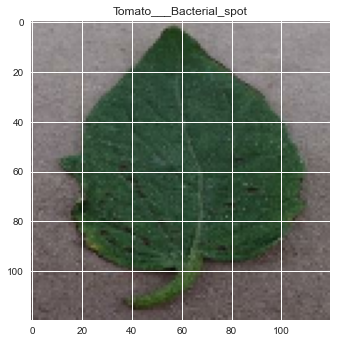

Tomato___Tomato_mosaic_virus


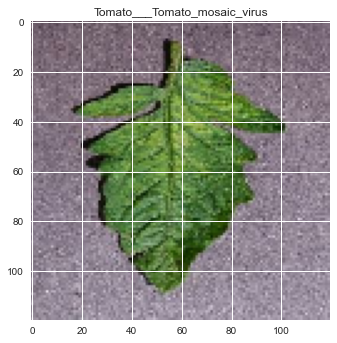

Tomato___Tomato_Yellow_Leaf_Curl_Virus


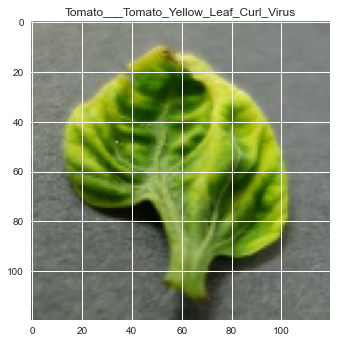

Tomato___Early_blight


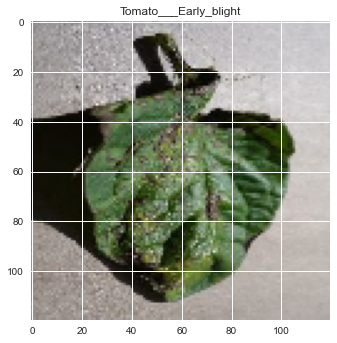

Tomato___Tomato_mosaic_virus


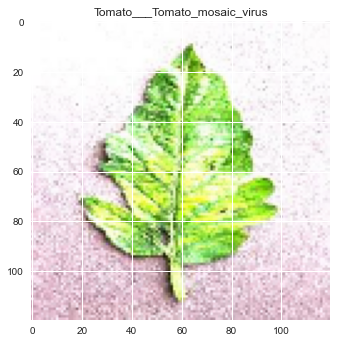

Tomato___Early_blight


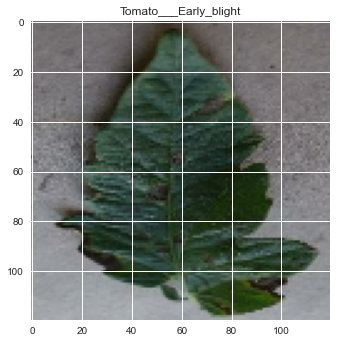

Tomato___Leaf_Mold


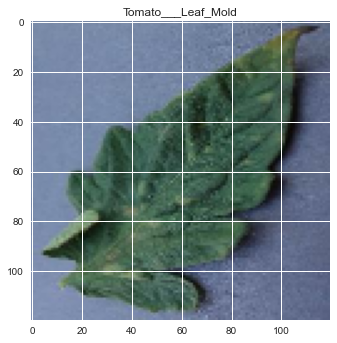

In [26]:
for images,label in test_ds.take(1):
    for i in range(len(images)):
#         print(x.shape)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        print(predict(images[i].numpy()))
        plt.show()

        
    
    

In [27]:
from keras.models import model_from_json

In [28]:
model_json = model.to_json()
with open("model_tomato.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_tomato.h5")

In [29]:
json_file = open('model_tomato.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_tomato.h5")

In [30]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [31]:
print(type(loaded_model))

<class 'keras.engine.sequential.Sequential'>


In [32]:
loaded_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
print(loaded_model.evaluate(test_ds))
print(loaded_model.evaluate(valid_ds))
print(loaded_model.evaluate(train_ds))

144/144 [==============================] - 26s 145ms/step - loss: 0.1171 - accuracy: 0.9575
[0.11705757677555084, 0.9574699997901917]
115/115 [==============================] - 29s 167ms/step - loss: 0.1190 - accuracy: 0.9590
[0.11902274936437607, 0.9589827656745911]
459/459 [==============================] - 69s 149ms/step - loss: 0.1004 - accuracy: 0.9630
[0.1004176065325737, 0.9630310535430908]
